# GRIP-The Sparks Foundation

Task-6 : Prediction Using Decision Tree ALgorithm.
         Create the Decision Tree classifier for the Iris Dataset and visualize it graphically.

# By : Pravallika Rebba

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

# Reading Data by using pandas

In [2]:
dataset= pd.read_csv(r'C:\Users\PRAVALLIKA\Desktop\Taks-6\iris.csv')
df=pd.DataFrame(dataset)
pd.set_option('display.float_format',lambda x:'%.2f'% x)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Describing the dataset

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As there are no null or empty values , there is no need to perform Imputation of Missing data

In [6]:
x=df.iloc[:,1:5].values
y=df.iloc[:,5].values

# Visualization of data

Number of Setosa species:  50
Number of versicolor species :  50
Number of virginica species :  50


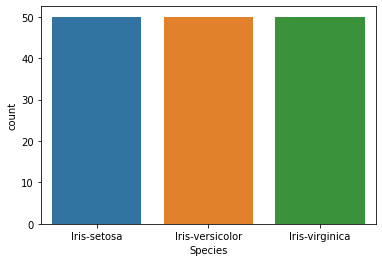

In [7]:
sns.countplot(x='Species',data=df)
setosa, versicolor,virginica = df['Species'].value_counts()
print('Number of Setosa species: ',setosa)
print('Number of versicolor species : ',versicolor)
print('Number of virginica species : ',virginica )

# Exploratory Data Analysis

# 2D Scatter Plot :Pair Plot
It shows relationship between various features of the dataset and also the probability denisty function which is a 
smoothed histogram

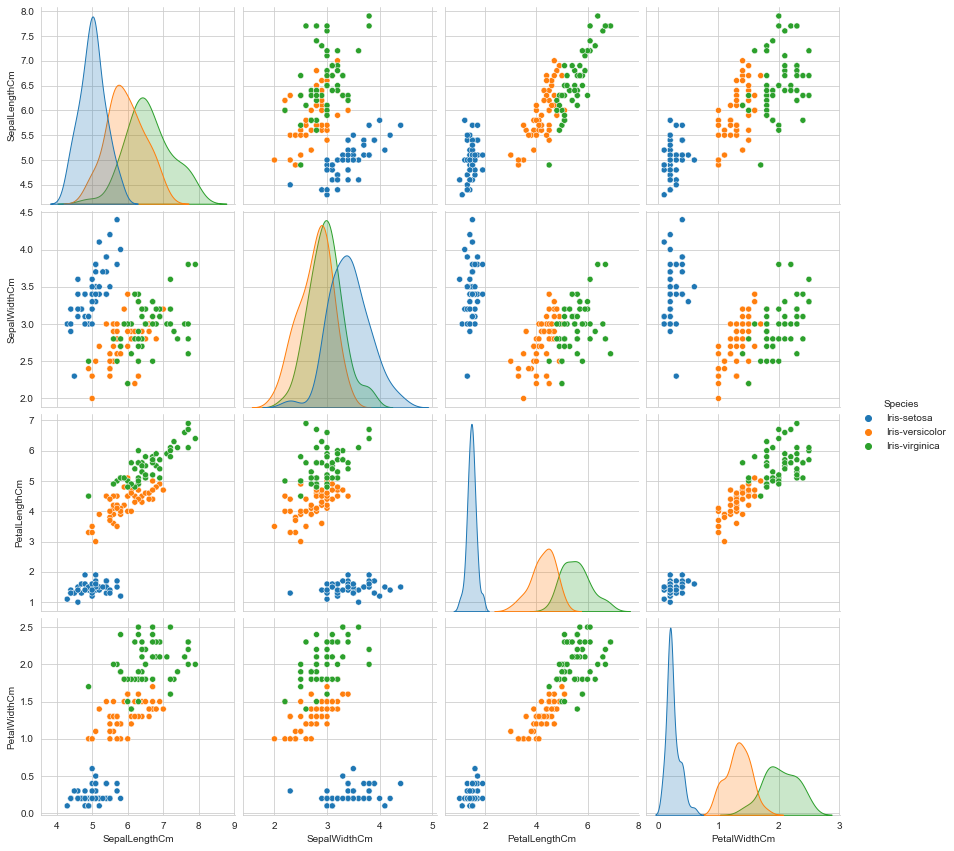

In [8]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df.drop('Id',axis=1),hue='Species',height=3)
plt.show()

This plot indicates that petal length and petal width are the most essential features to identify various flower types.
Setosa can be easily linearly seperable versicolor and virginica overlap each other.
We can from simple rules by observing the pdf's ,by using just one feature a simple model can be formed ,for example 
if(PetalLengthCm) < 2.5 the flower type is Setosa. 

# Violin Plot
Violin plots are used to compare the distribution of given varible across different categories.This shows both density plot 
and box plot. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SepalLengthCm'),
  Text(1, 0, 'SepalWidthCm'),
  Text(2, 0, 'PetalLengthCm'),
  Text(3, 0, 'PetalWidthCm')])

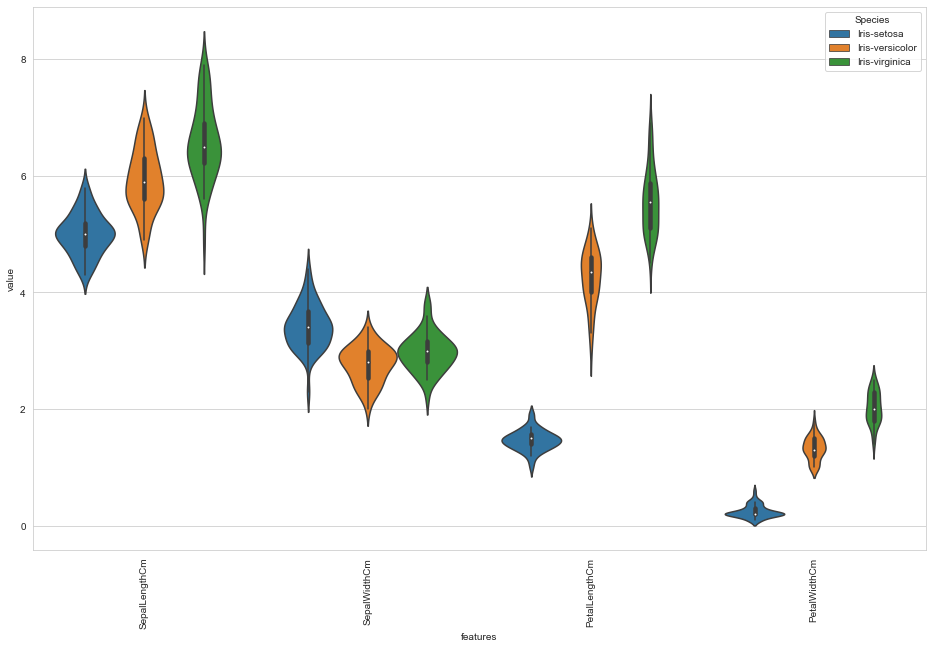

In [9]:
data = pd.melt(df.drop('Id',axis=1),id_vars="Species",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(16,10))
sns.violinplot(x="features", y="value", hue="Species", data=data, inner="box")
plt.xticks(rotation=90)

From above plot we can see the existence of outliers in SepalLengthCm and PetalLengthCm

We have extracted the data attributes and corresponding labels, now we will split the data into training and testing set.
For this purpose we will use the 'train_test_split' function.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [11]:
print('Shape of x_train', x_train.shape)
print('Shape of x_test', x_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (105, 4)
Shape of x_test (45, 4)
Shape of y_train (105,)
Shape of y_test (45,)


# Prediction Using Decision Tree Classifier

Decision trees have two advantages Simplicity and Accuracy, the classifier is used to classify discrete categorical target 
variables.We will initiate the Decision Tree Classifier by default parameters and fit the classifier on the training data.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=40)
dtree.fit(x_train,y_train)
print("Model/Classifier Created")

Model/Classifier Created


In [13]:
classes=np.unique(df["Species"].values)
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import display
import graphviz

# Visualization of the Decision Tree

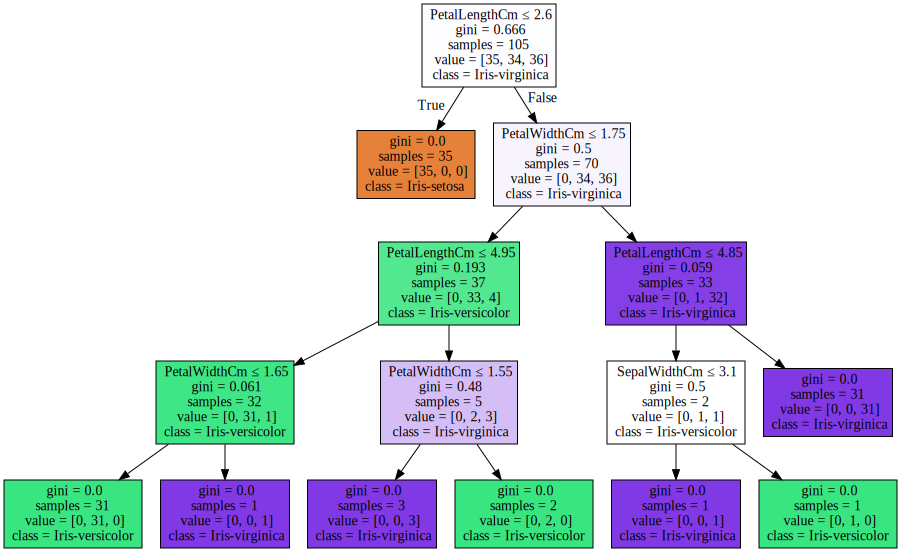

In [15]:
dot_data_org=export_graphviz(dtree,out_file=None,filled=True,special_characters=True,
                feature_names=features,class_names=classes)
graph_org=graphviz.Source(dot_data_org)
graph_org

In [16]:
y_pred = dtree.predict(x_test)
y_train_pred=dtree.predict(x_train)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Testing Accuracy is:  97.77777777777777


<AxesSubplot:>

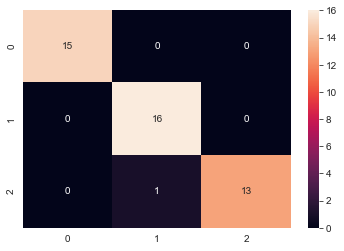

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac = accuracy_score(y_test,y_pred)
print('Testing Accuracy is: ',ac*100)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

# Tree Pruning

Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a 
practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to 
improve the tree’s structure.  It makes it versatile so that it can adapt if we feed any new kind of data to it, thereby 
fixing the problem of overfitting.DecisionTree in sklearn has a function called "cost_complexity_pruning_path" , which gives 
the effective alphas of subtrees during pruning and also the corresponding impurities. 

In [18]:
path=dtree.cost_complexity_pruning_path(x_train,y_train)
alpha=path['ccp_alphas']
print(alpha)

[0.         0.00923521 0.01845238 0.02285714 0.02664414 0.24663714
 0.33342404]


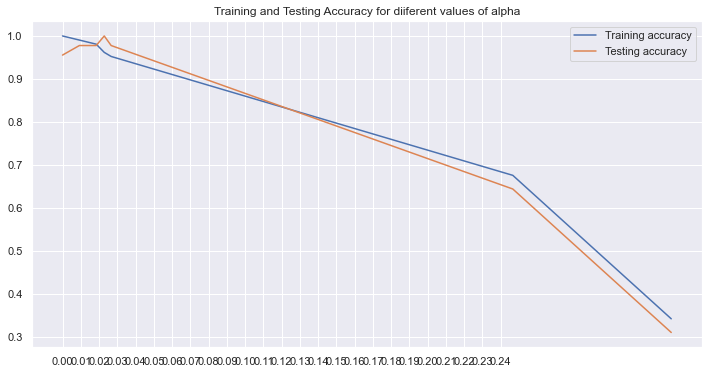

In [19]:
acc_train,acc_test=[],[]
for i in alpha:
    classifier=DecisionTreeClassifier(ccp_alpha=i)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    y_train_pred=classifier.predict(x_train)
    acc_train.append(accuracy_score(y_train,y_train_pred))
    acc_test.append(accuracy_score(y_test,y_pred))
sns.set()
plt.figure(figsize=(12,6))
plt.title("Training and Testing Accuracy for diiferent values of alpha")
sns.lineplot(y=acc_train,x=alpha,label='Training accuracy')
sns.lineplot(y=acc_test,x=alpha,label='Testing accuracy')   
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

From the above plot, we can see that between alpha=0.02 and 0.03, we get the maximum test accuracy

In [20]:
dtree1=DecisionTreeClassifier(random_state=40,ccp_alpha=0.023)
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.023, random_state=40)

# Visualization of the Decision Tree after Pruning

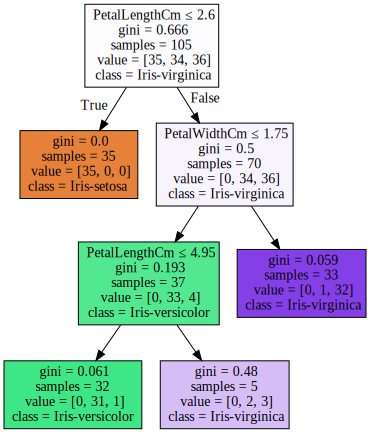

In [21]:
dot_data=export_graphviz(dtree1,out_file=None,filled=True,special_characters=True,
                feature_names=features,class_names=classes)
graph=graphviz.Source(dot_data)
graph

In [22]:
y_pred1 = dtree1.predict(x_test)

# Accuracy after pruning

Testing Accuracy is:  100.0


<AxesSubplot:>

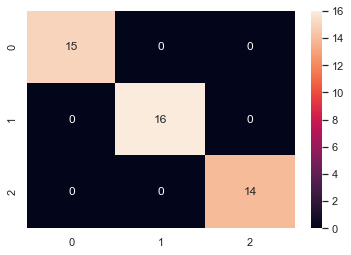

In [23]:
ac1 = accuracy_score(y_test,y_pred1)
print('Testing Accuracy is: ',ac1*100)
cm1= confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True,fmt="d")

In [24]:
print(classification_report(y_test, y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

